In [1]:
# Template for lab02 task 3
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import sys

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0         # 0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.04   #0.04
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector


In [2]:
# Rotate an image
#
# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    R=cv2.getRotationMatrix2D((y,x),angle,1)
    rows,cols,channels=image.shape
    output=cv2.warpAffine(img0,R,(cols,rows))
    return output

In [3]:
# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    rows,cols,channels = image.shape
    x = rows/2
    y = cols/2
    return x,y

<IPython.core.display.Javascript object>


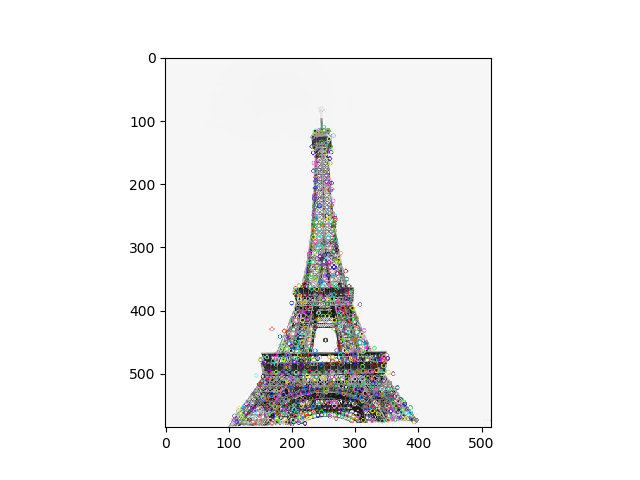

(959,)


In [4]:
if __name__ == '__main__':
    # task 1
    # 1.1
    # Read image with OpenCV and convert to grayscale
    img0=cv2.imread('Eiffel_Tower.jpg')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    # Initialize SIFT detector
    sift=SiftDetector()
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(img_key)
    cv2.imwrite('task1_default_parameters.png',img0)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

<IPython.core.display.Javascript object>


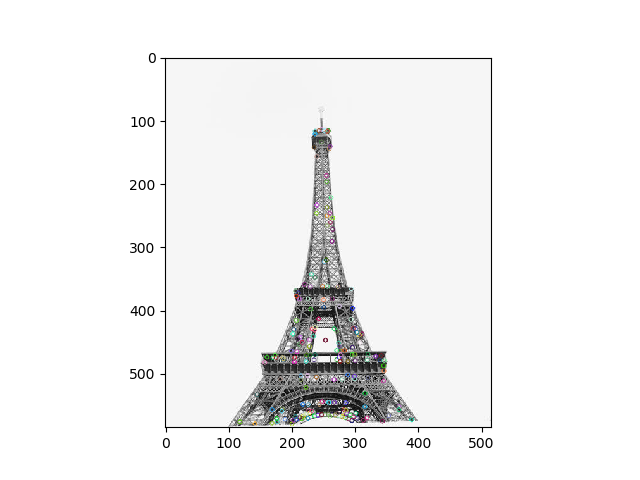

(240,)


In [34]:
    # 1.2
    # Read image with OpenCV and convert to grayscale
    img0=cv2.imread('Eiffel_Tower.jpg')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    # Initialize SIFT detector
    params={}
    params["n_features"]=240         # 0
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04   #0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6
    sift=SiftDetector("L2", params)
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(img_key)
    cv2.imwrite('task1_1/4_features.png',img0)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

<IPython.core.display.Javascript object>


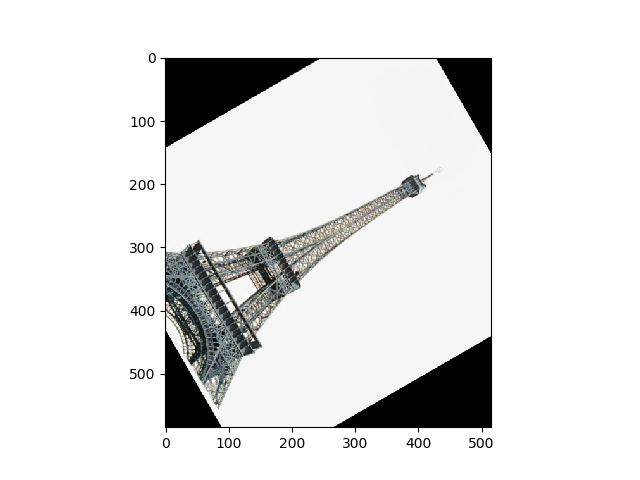

True

In [22]:
    # task 2
    # 2.1
    # Rotate around point at center of image.
    img0=cv2.imread('Eiffel_Tower.jpg')
    coordinates=get_img_center(img0)
    x=coordinates[0]
    y=coordinates[1]
    output=rotate(img0,x,y,-60)
    plt.imshow(output)
    cv2.imwrite('task2_Rotate_60_degrees.png',output)

<IPython.core.display.Javascript object>


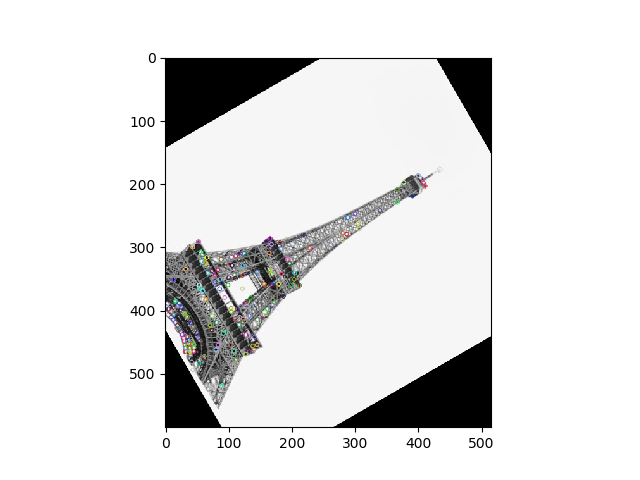

(240,)


In [37]:
    # 2.2
    # Extract SIFT features and show the keypoints on the rotated image, using the same
    # parameter settings as task 1 (for reduced number of keypoints)
    img0=cv2.imread('task2_Rotate_60_degrees.png')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    params={}
    params["n_features"]=240         # 0
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04   #0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6
    sift=SiftDetector("L2", params)
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(img_key)
    cv2.imwrite('task2_quater_features.png', img_key)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

<IPython.core.display.Javascript object>


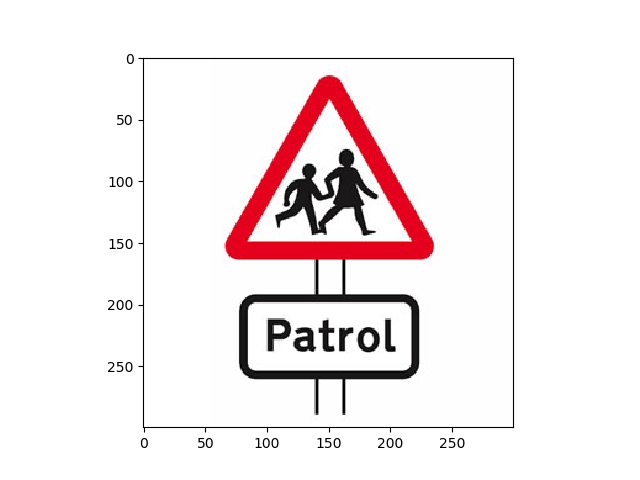

True

In [54]:
    # task 3
    # 3.1
    # Rotate around point at center of image 0 degree.
    img0=cv2.imread('road_sign.jpg')
    coordinates=get_img_center(img0)
    x=coordinates[0]
    y=coordinates[1]
    output=rotate(img0,x,y,0)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_Rotate_0_degrees.png',output)

<IPython.core.display.Javascript object>


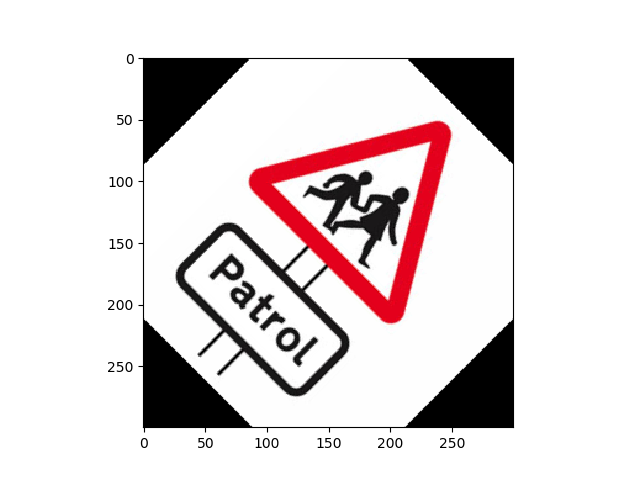

True

In [46]:
    # 3.1
    # Rotate around point at center of image 45 degree.
    img0=cv2.imread('road_sign.jpg')
    coordinates=get_img_center(img0)
    x=coordinates[0]
    y=coordinates[1]
    output=rotate(img0,x,y,-45)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_Rotate_45_degrees.png',output)

<IPython.core.display.Javascript object>


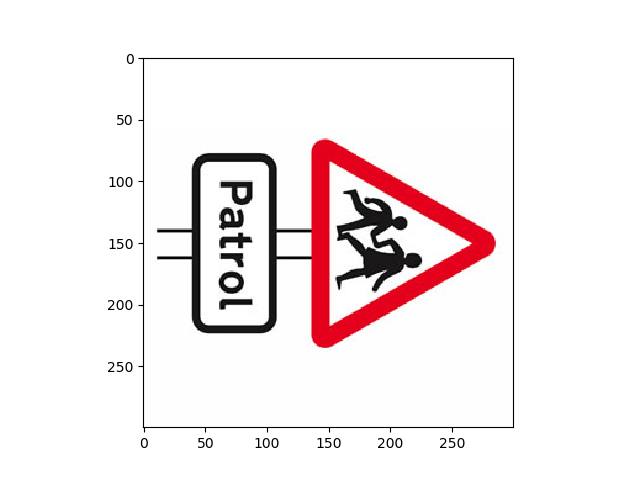

True

In [47]:
    # 3.1
    # Rotate around point at center of image 90 degree.
    img0=cv2.imread('road_sign.jpg')
    coordinates=get_img_center(img0)
    x=coordinates[0]
    y=coordinates[1]
    output=rotate(img0,x,y,-90)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_Rotate_90_degrees.png',output)

<IPython.core.display.Javascript object>


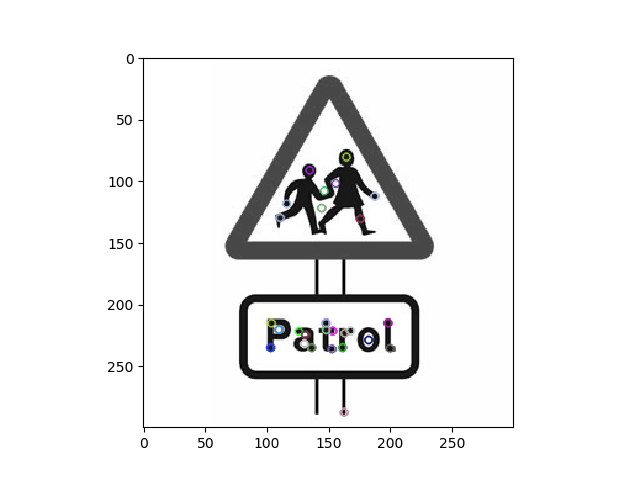

(50,)


In [56]:
    # 3.2          0 degree
    # Extract SIFT features and show the keypoints on the rotated image, using the same
    # parameter settings as task 1 (for reduced number of keypoints)
    img0=cv2.imread('task3_Rotate_0_degrees.png')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    params={}
    params["n_features"]=50         # 0
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04   #0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6
    sift=SiftDetector("L2", params)
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(cv2.cvtColor(img_key, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_0_quater_features.png', img_key)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

<IPython.core.display.Javascript object>


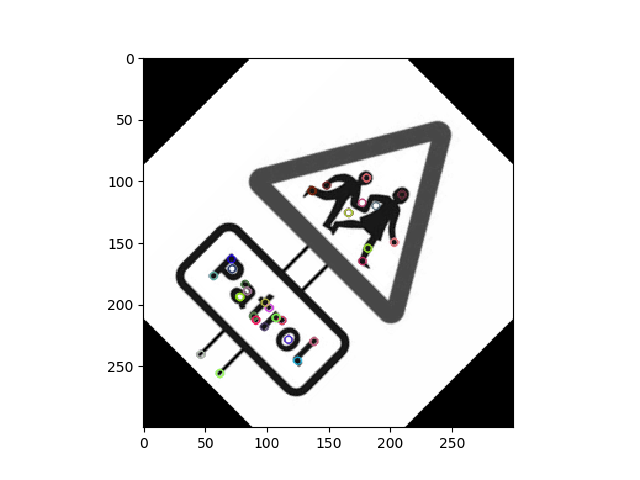

(50,)


In [60]:
    # 3.2             45 degrees
    # Extract SIFT features and show the keypoints on the rotated image, using the same
    # parameter settings as task 1 (for reduced number of keypoints)
    img0=cv2.imread('task3_Rotate_45_degrees.png')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    params={}
    params["n_features"]=50         # 0
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04   #0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6
    sift=SiftDetector("L2", params)
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(cv2.cvtColor(img_key, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_45_quater_features.png', img_key)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

<IPython.core.display.Javascript object>


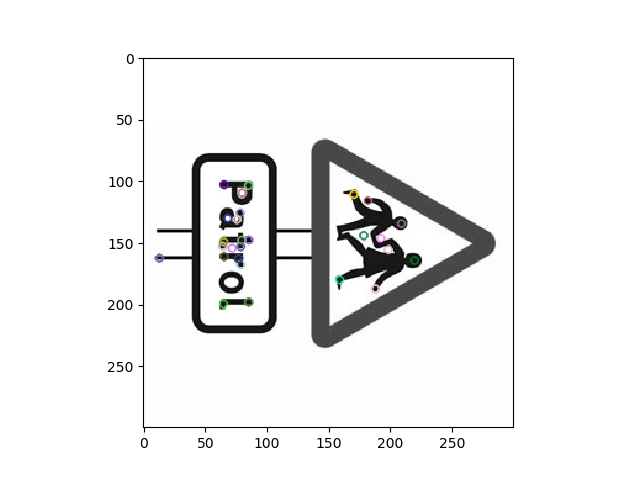

(50,)


In [58]:
    # 3.2             90 degrees
    # Extract SIFT features and show the keypoints on the rotated image, using the same
    # parameter settings as task 1 (for reduced number of keypoints)
    img0=cv2.imread('task3_Rotate_90_degrees.png')
    gray=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    params={}
    params["n_features"]=50         # 0
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04   #0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6
    sift=SiftDetector("L2", params)
    sift_detector=sift.detector
    # Store SIFT keypoints of original image in a Numpy array
    kp=sift_detector.detect(gray, None)
    img_key=cv2.drawKeypoints(gray,kp,img0)
    plt.imshow(cv2.cvtColor(img_key, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_90_quater_features.png', img_key)
        # caculate keypoints:
    kp,des=sift_detector.compute(gray,kp)
    kp_array=np.array(kp)
    print(kp_array.shape)

In [63]:
    # 3.2
    # find the keypoints and descriptors with SIFT of original img
    img_or=cv2.imread('road_sign.jpg',0)
    kp_or, des_or = sift_detector.detectAndCompute(img_or,None)
    img0=cv2.imread('task3_0_quater_features.png')
    kp0, des0 = sift_detector.detectAndCompute(img0,None)
    img45=cv2.imread('task3_45_quater_features.png')
    kp45, des45 = sift_detector.detectAndCompute(img45,None)
    img90=cv2.imread('task3_90_quater_features.png')
    kp90, des90 = sift_detector.detectAndCompute(img90,None)


<IPython.core.display.Javascript object>


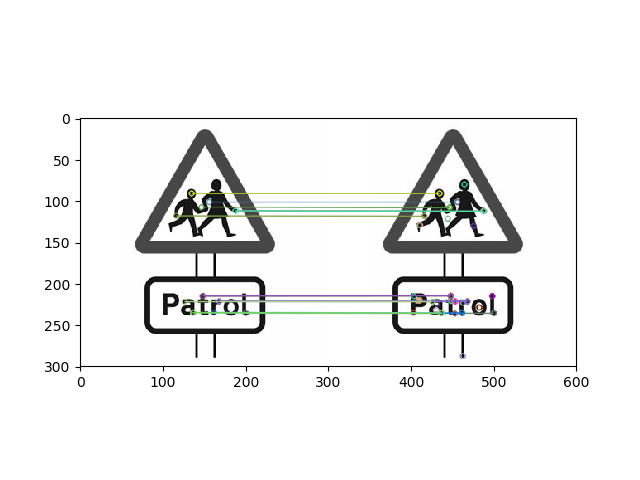

True

In [64]:
    # 0
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des_or,des0,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img_or,kp_or,img0,kp0,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    cv2.imwrite('task3_0_match.png', img3)

<IPython.core.display.Javascript object>


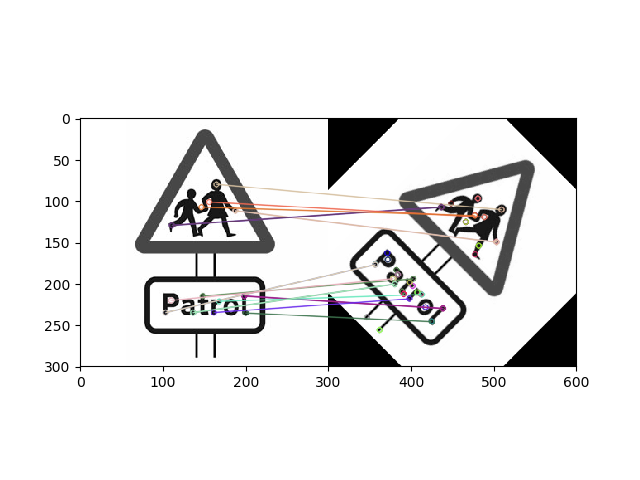

True

In [65]:
    # 45
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des_or,des45,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img_or,kp_or,img45,kp45,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_45_match.png', img3)

<IPython.core.display.Javascript object>


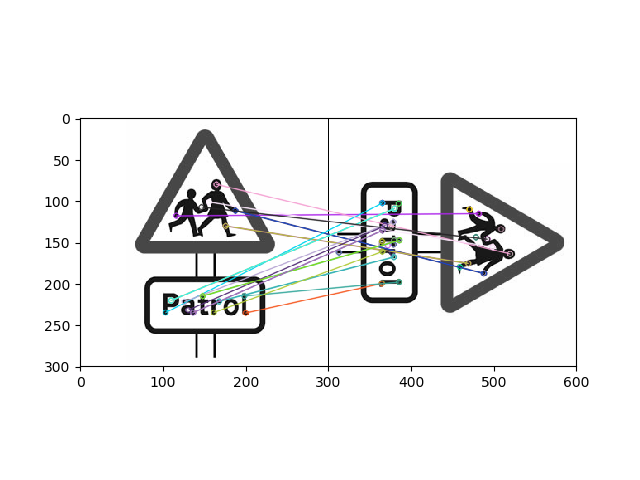

True

In [66]:
    # 90
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des_or,des90,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img_or,kp_or,img90,kp90,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    cv2.imwrite('task3_90_match.png', img3)

array([[255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       ...,
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254]], dtype=uint8)

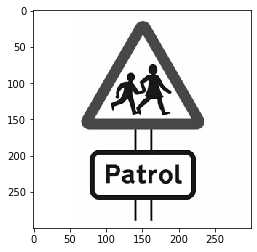

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img0=cv2.imread('road_sign.jpg',0)
plt.imshow(img0,cmap='gray')
img0